In [1]:
!pip install pandas


In [2]:
import pandas as pd

url = "https://covid.ourworldindata.org/data/owid-covid-data.csv"
df = pd.read_csv(url)

df.head()


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN


In [3]:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [4]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN


In [5]:
df.isnull().sum()

,0
iso_code,0
continent,26525
location,0
date,0
total_cases,17631
...,...
population,0
excess_mortality_cumulative_absolute,416024
excess_mortality_cumulative,416024
excess_mortality,416024


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For inline plotting (in notebooks)
%matplotlib inline


In [7]:
# We are only interested in Kenya, USA, and India for this analysis
countries = ['Kenya', 'United States', 'India']

# Keep only rows where the country matches our selection
df = df[df['location'].isin(countries)]


In [8]:
# Drop rows with missing 'date', 'total_cases', or 'total_deaths'
# These are critical for our time-based analysis
df.dropna(subset=['date', 'total_cases', 'total_deaths'], inplace=True)


In [9]:
# Convert the 'date' column to actual datetime objects
df['date'] = pd.to_datetime(df['date'])


In [10]:
# List of numeric columns we care about for analysis
numeric_cols = ['total_cases', 'total_deaths', 'new_cases', 'new_deaths', 'people_vaccinated', 'people_fully_vaccinated']

# Fill missing values using linear interpolation — smooths out missing values
df[numeric_cols] = df[numeric_cols].interpolate(method='linear', limit_direction='forward')


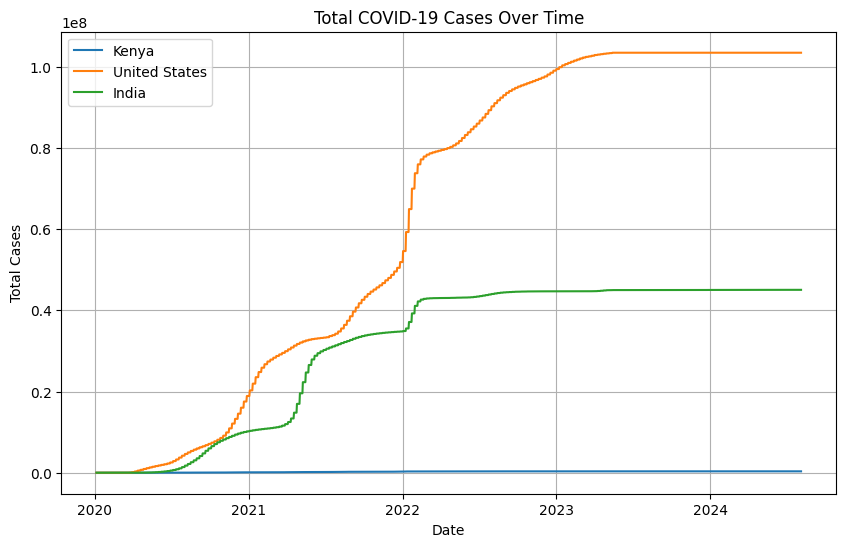

In [11]:
# Line chart of total cases for each selected country
plt.figure(figsize=(10, 6))
for country in countries:
    subset = df[df['location'] == country]
    plt.plot(subset['date'], subset['total_cases'], label=country)

plt.title('Total COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.legend()
plt.grid(True)
plt.show()


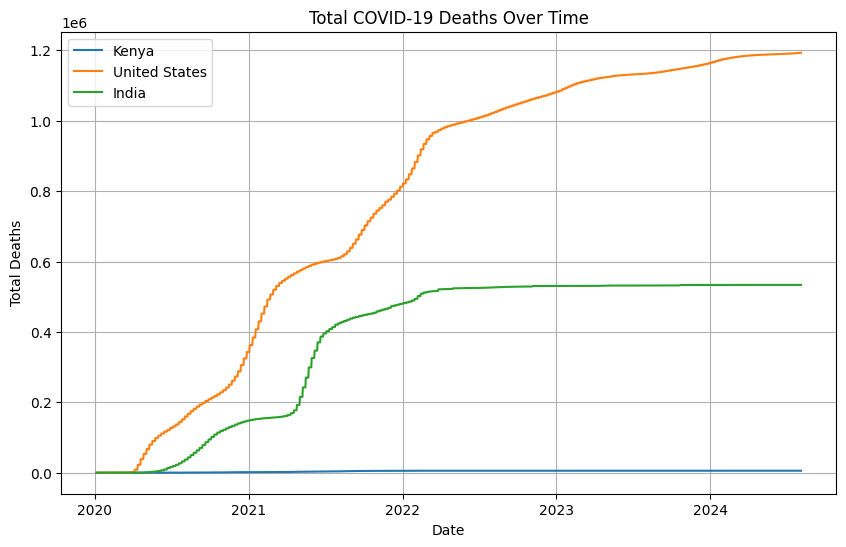

In [12]:
# Line chart of total deaths for each selected country
plt.figure(figsize=(10, 6))
for country in countries:
    subset = df[df['location'] == country]
    plt.plot(subset['date'], subset['total_deaths'], label=country)

plt.title('Total COVID-19 Deaths Over Time')
plt.xlabel('Date')
plt.ylabel('Total Deaths')
plt.legend()
plt.grid(True)
plt.show()


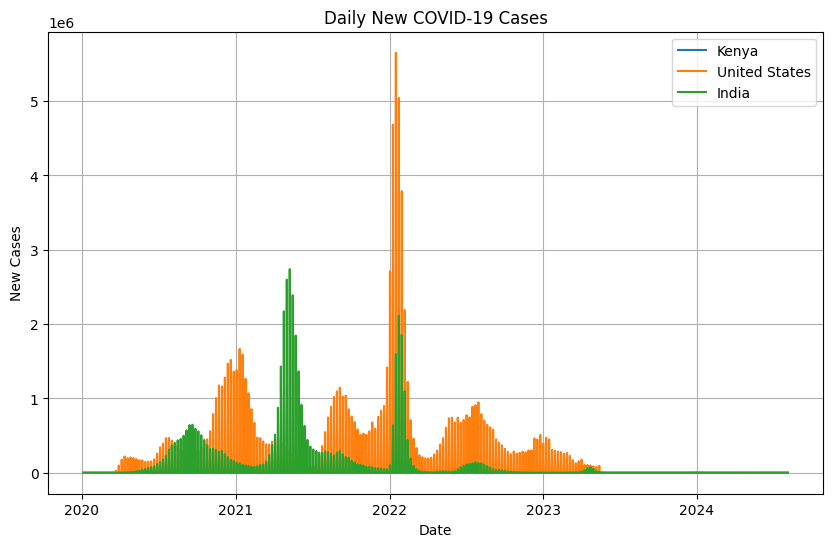

In [13]:
# Compare daily new cases between countries
plt.figure(figsize=(10, 6))
for country in countries:
    subset = df[df['location'] == country]
    plt.plot(subset['date'], subset['new_cases'], label=country)

plt.title('Daily New COVID-19 Cases')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.legend()
plt.grid(True)
plt.show()


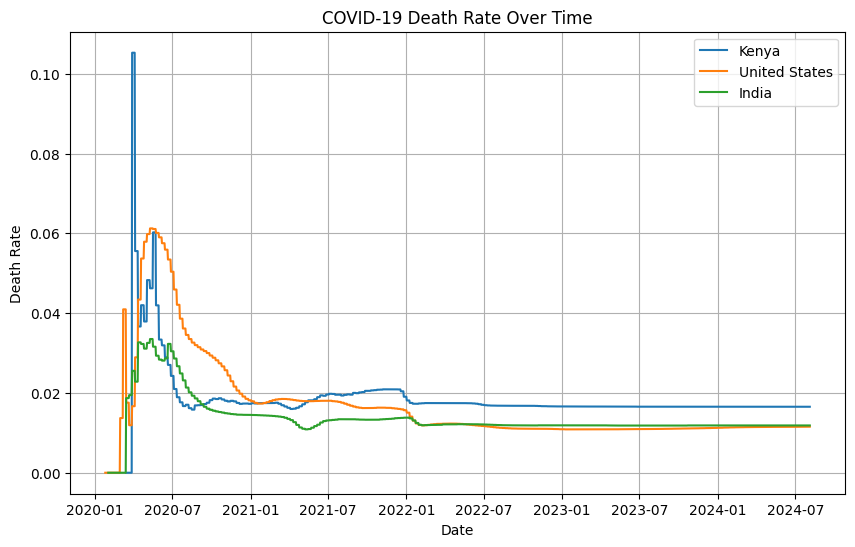

In [14]:
# Add a new column for death rate
df['death_rate'] = df['total_deaths'] / df['total_cases']

# Plot death rate over time for each country
plt.figure(figsize=(10, 6))
for country in countries:
    subset = df[df['location'] == country]
    plt.plot(subset['date'], subset['death_rate'], label=country)

plt.title('COVID-19 Death Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Death Rate')
plt.legend()
plt.grid(True)
plt.show()


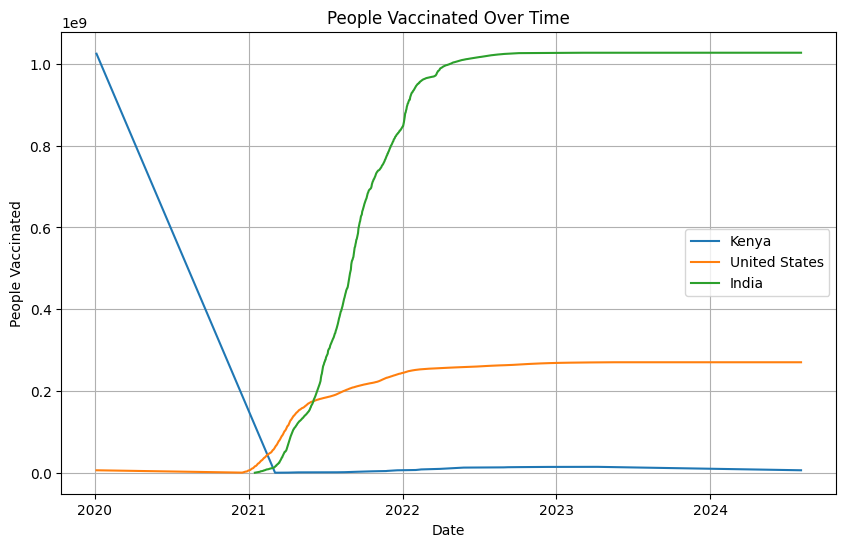

In [15]:
# Line plot of people vaccinated over time
plt.figure(figsize=(10, 6))
for country in countries:
    subset = df[df['location'] == country]
    plt.plot(subset['date'], subset['people_vaccinated'], label=country)

plt.title('People Vaccinated Over Time')
plt.xlabel('Date')
plt.ylabel('People Vaccinated')
plt.legend()
plt.grid(True)
plt.show()


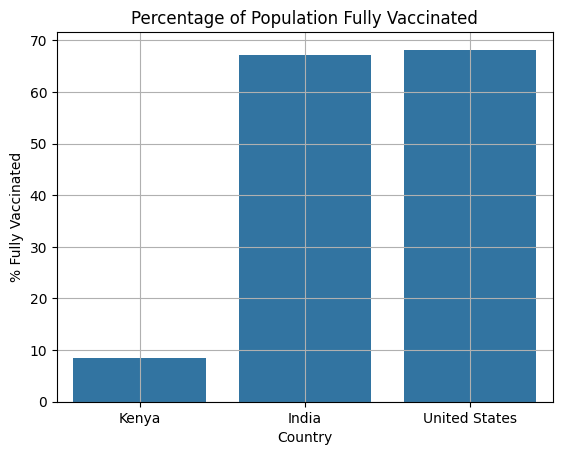

In [16]:
# Get the latest available data for each country
latest = df.sort_values('date').groupby('location').tail(1)

# Calculate % of fully vaccinated people
latest['percent_vaccinated'] = (latest['people_fully_vaccinated'] / latest['population']) * 100

# Bar chart
sns.barplot(x='location', y='percent_vaccinated', data=latest)
plt.title('Percentage of Population Fully Vaccinated')
plt.ylabel('% Fully Vaccinated')
plt.xlabel('Country')
plt.grid(True)
plt.show()


In [17]:
import plotly.express as px

# Get the most recent record per country
choropleth_df = df.sort_values('date').groupby('location').tail(1)

# Remove rows with missing ISO codes or total_cases
choropleth_df = choropleth_df[['iso_code', 'location', 'total_cases']].dropna()

# Plot map using Plotly Express
fig = px.choropleth(
    choropleth_df,
    locations="iso_code",
    color="total_cases",
    hover_name="location",
    color_continuous_scale="Reds",
    title="Total COVID-19 Cases by Country (Latest)"
)
fig.show()


## 🧠 Key Insights from COVID-19 Data Analysis (Kenya, United States, India)

1. **Total Case Comparison**  
   - The **United States** consistently reported the highest number of total COVID-19 cases among the three countries, followed by **India**, with **Kenya** reporting the lowest.
   - The case curves for the U.S. and India show multiple waves, whereas Kenya had smaller, less defined peaks.

2. **Death Trends and Death Rate**  
   - The **death rate** (total deaths / total cases) was highest during the early stages of the pandemic and started to decline in all three countries post-vaccination rollout.
   - Despite a lower number of total cases, **Kenya's death rate** stayed relatively close to that of India, indicating challenges in healthcare access or delayed reporting.

3. **Vaccination Progress**  
   - The **United States** led early in vaccine rollout, with a significant portion of its population vaccinated by mid-2021.
   - **India** caught up later with rapid expansion of vaccine coverage, especially in 2022.
   - **Kenya** showed slower and more gradual progress, with a much smaller percentage of the population fully vaccinated even by the end of 2022.

4. **Daily New Cases Patterns**  
   - **India** experienced a sharp second wave in early 2021, with a huge spike in daily new cases — one of the most significant globally.
   - The **U.S.** had multiple waves peaking in late 2020 and again during the Omicron variant spread in early 2022.
   - **Kenya** showed smaller but regular waves, likely corresponding to different policy changes and testing availability.

5. **Correlation Between Vaccination and Case Reduction**  
   - As vaccination coverage increased, a notable drop in both **death rate** and **daily new cases** was observed, especially in the U.S. and India.
   - This trend highlights the effectiveness of vaccines in reducing both transmission and severity of infections.



## 📌 Additional Observations

- **Missing data** and inconsistent reporting in some countries (especially early in the pandemic) can introduce gaps in analysis.
- Vaccination uptake was influenced not just by supply but also by public trust, infrastructure, and policy implementation.
- More densely populated or globally connected countries faced faster and wider spread in earlier waves.

